In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
split_file_paths = ['https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_1.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_2.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_3.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_4.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_5.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_6.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_7.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_8.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_9.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_10.csv']

In [3]:
MP_bandgap = pd.concat([pd.read_csv(file) for file in split_file_paths])

'./MP_bandgap_combined.csv'

## Take a quick look at the Data structure

In [4]:
MP_bandgap.head()

,Index,Formula,mp-id,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
0,0,LiCaPb,mp-20998,0.0000,9,187,3,0.577350,0.480750,0.415244,...,229,225,226.333333,0.161290,0.064516,0.322581,0.451613,0,0.365948,0.160765
1,1,Li7Mn4CoO12,mp-1175256,0.7477,24,1,4,0.603807,0.536606,0.506969,...,229,12,12.000000,0.353448,0.413793,0.232759,0.000000,0,0.779730,0.357256
2,2,K2CuF4,mp-2865,0.0000,28,142,3,0.654654,0.597048,0.575065,...,229,15,15.000000,0.268293,0.487805,0.243902,0.000000,1,0.917619,0.428188
3,3,Li2Mn3Cr3O12,mp-850956,0.0927,20,10,4,0.644205,0.607092,0.600250,...,229,12,12.000000,0.309735,0.424779,0.265487,0.000000,0,0.779730,0.304103
4,4,Fe1B4,mp-1079437,0.0000,10,58,2,0.824621,0.804145,0.800156,...,229,166,166.000000,0.500000,0.200000,0.300000,0.000000,0,0.010964,0.003509


In [5]:
MP_bandgap.tail()

,Index,Formula,mp-id,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
15474,154713,SrIn3,mp-1187154,0.0000,4,221,2,0.790569,0.759147,0.750616,...,225,139,139.0,0.195122,0.073171,0.731707,0.000000,0,0.158210,0.059329
15475,154714,CaBiF5,mp-1368365,4.0617,28,14,3,0.742307,0.718075,0.714377,...,225,12,15.0,0.212121,0.424242,0.151515,0.212121,1,0.891402,0.317238
15476,154715,Ba2MgTiO4,mp-2222934,0.0000,8,123,4,0.586302,0.524792,0.503277,...,229,12,12.0,0.470588,0.470588,0.058824,0.000000,1,0.803211,0.369271
15477,154716,MnInPd2,mp-31328,0.0000,4,225,3,0.612372,0.538609,0.506099,...,225,139,225.0,0.100000,0.025000,0.875000,0.000000,0,0.100238,0.037487
15478,154717,SiIr3,mp-1841,0.0000,8,140,2,0.790569,0.759147,0.750616,...,227,225,225.0,0.109589,0.027397,0.287671,0.575342,0,0.022249,0.008343


In [6]:
# Columns name
MP_bandgap.columns

Index(['Index', 'Formula', 'mp-id', 'bandgap', 'nsites', 'spacegroup_number',
       'NComp', 'Comp_L2Norm', 'Comp_L3Norm', 'Comp_L5Norm',
       ...
       'max_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber',
       'frac_sValence', 'frac_pValence', 'frac_dValence', 'frac_fValence',
       'CanFormIonic', 'MaxIonicChar', 'MeanIonicChar'],
      dtype='object', length=151)

In [7]:
#Information about Data
MP_bandgap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154718 entries, 0 to 15478
Columns: 151 entries, Index to MeanIonicChar
dtypes: float64(96), int64(53), object(2)
memory usage: 179.4+ MB


In [8]:
#Data type
MP_bandgap.dtypes

#MP_bandgap.dtypes[0:50]
#MP_bandgap.dtypes[50:100]""
#MP_bandgap.dtypes[100:]

Index              int64
Formula           object
mp-id             object
bandgap          float64
nsites             int64
                  ...   
frac_dValence    float64
frac_fValence    float64
CanFormIonic       int64
MaxIonicChar     float64
MeanIonicChar    float64
Length: 151, dtype: object

In [9]:
MP_bandgap.describe()

,Index,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
count,154718.000000,154718.000000,154718.000000,154718.00000,154718.000000,154718.000000,154718.000000,154718.000000,154718.000000,154718.000000,...,154718.000000,154718.000000,154718.000000,154718.000000,154718.000000,154718.000000,154718.000000,154718.000000,154707.000000,154707.000000
mean,77358.500000,1.055169,31.447233,84.22307,3.464917,0.660476,0.607652,0.584982,0.579643,0.576853,...,220.048895,62.287213,85.186206,0.299354,0.326219,0.269383,0.105043,0.508810,0.514710,0.190607
std,44663.383812,1.503758,34.878837,80.85012,0.990121,0.076313,0.093366,0.105881,0.110447,0.113427,...,20.643270,75.850992,87.614826,0.136632,0.194612,0.218096,0.171638,0.499924,0.289850,0.118522
min,0.000000,0.000000,1.000000,1.00000,1.000000,0.395285,0.297370,0.238495,0.215285,0.199372,...,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38679.250000,0.000000,10.000000,11.00000,3.000000,0.612372,0.538609,0.506099,0.501109,0.500098,...,225.000000,12.000000,12.000000,0.208333,0.156863,0.094340,0.000000,0.000000,0.229026,0.074326
50%,77358.500000,0.083000,20.000000,62.00000,3.000000,0.648074,0.603681,0.579020,0.572069,0.571484,...,229.000000,12.000000,15.000000,0.297297,0.371163,0.226667,0.000000,1.000000,0.590585,0.203420
75%,116037.750000,1.858600,40.000000,160.00000,4.000000,0.707107,0.658522,0.647881,0.646555,0.645706,...,229.000000,139.000000,194.000000,0.358974,0.487310,0.400000,0.179487,1.000000,0.779730,0.294785
max,154717.000000,17.891400,444.000000,230.00000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,229.000000,229.000000,229.000000,1.000000,0.750000,1.000000,0.875000,1.000000,0.921450,0.460725


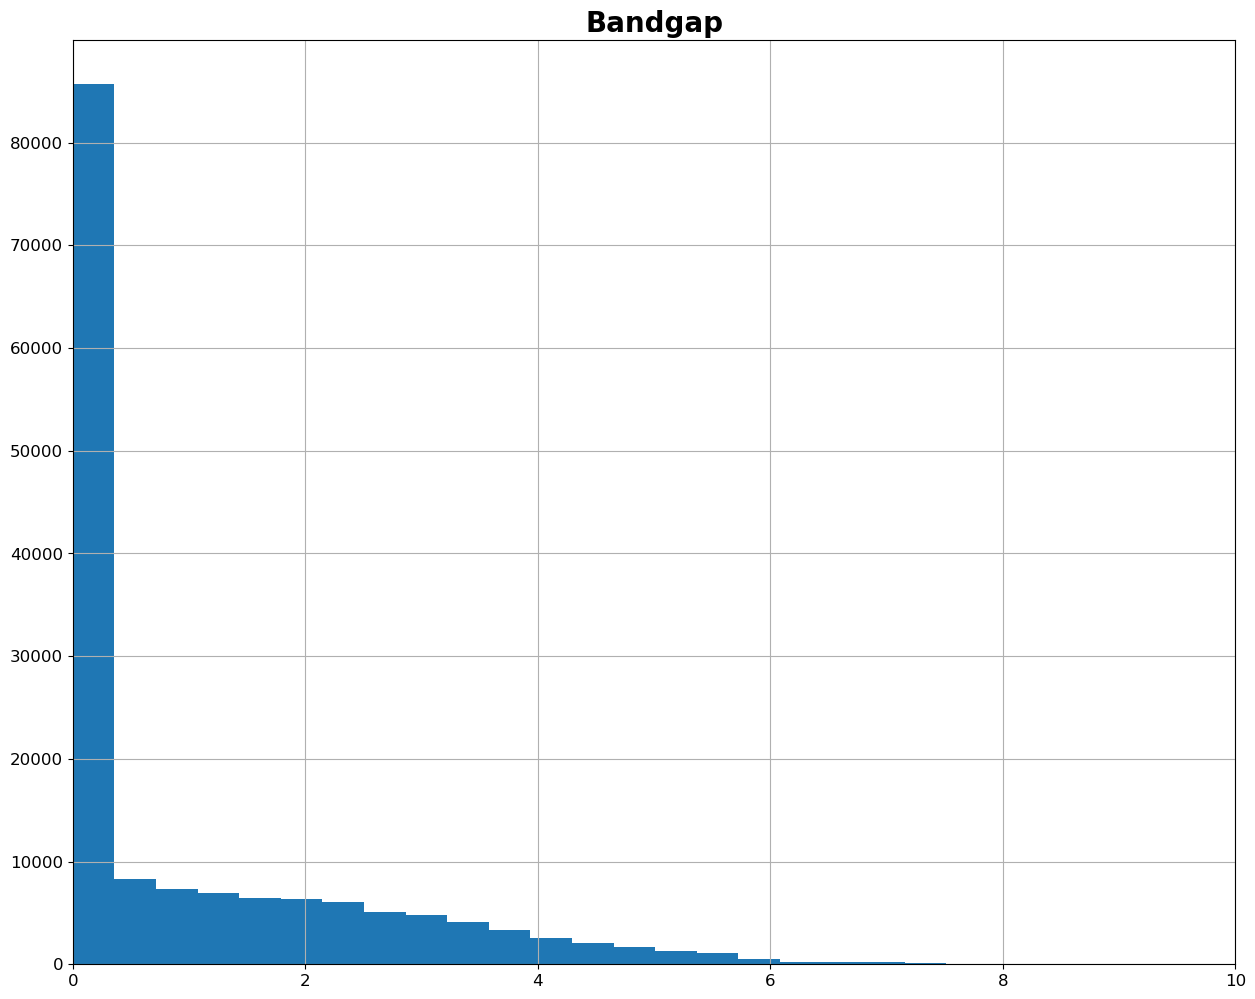

In [11]:
MP_bandgap['bandgap'].hist(bins=50, figsize=(15,12))

#save_fig("attribute_histogram_plots")


title_font = {'fontsize': 20,'fontweight': 'bold'}
plt.title('Bandgap', fontdict=title_font)

plt.xlim([0, 10])
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

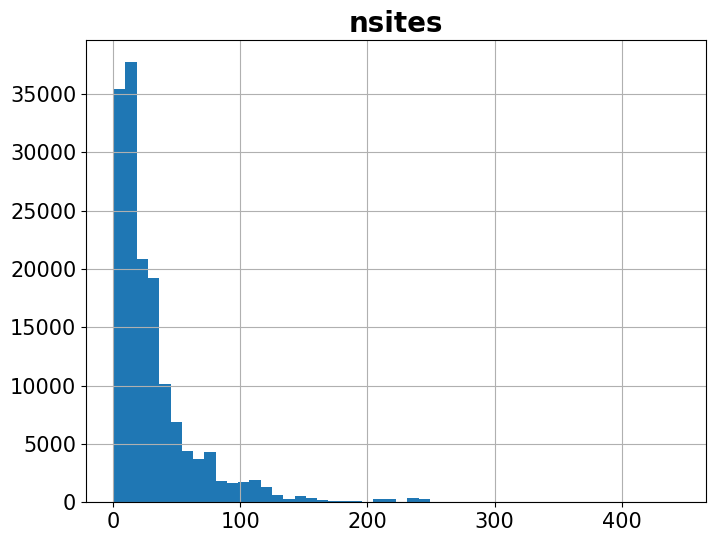

In [12]:
import matplotlib.pyplot as plt
MP_bandgap['nsites'].hist(bins=50, figsize=(8,6))

#save_fig("attribute_histogram_plots")


#title_font = {'fontsize': 20,'fontweight': 'bold'}
plt.title('nsites', fontdict=title_font)

#plt.xlim([0, 10])
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

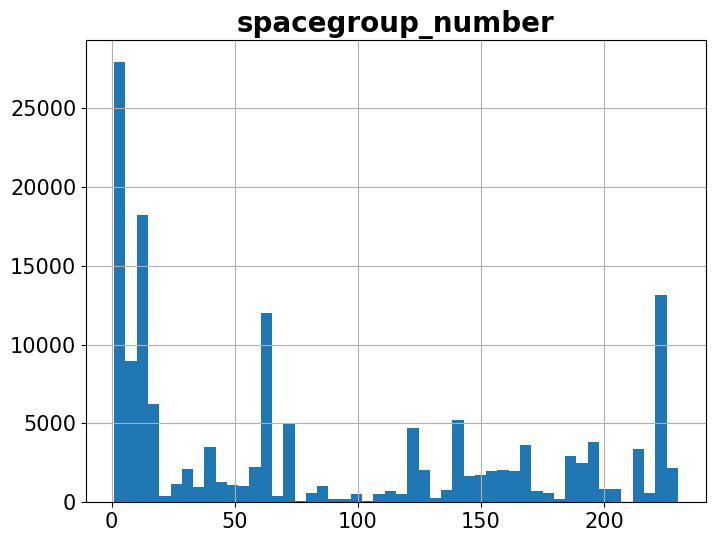

In [13]:
MP_bandgap['spacegroup_number'].hist(bins=50, figsize=(8,6))

#save_fig("attribute_histogram_plots")


#title_font = {'fontsize': 20,'fontweight': 'bold'}
plt.title('spacegroup_number', fontdict=title_font)

#plt.xlim([0, 10])
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

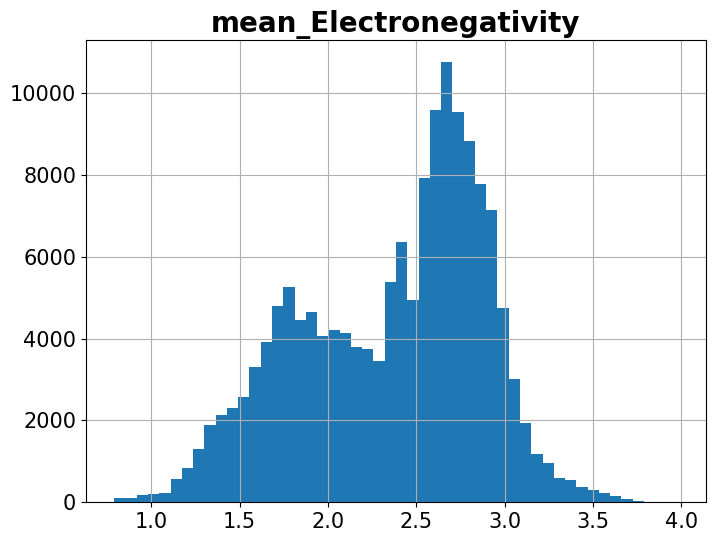

In [14]:
MP_bandgap['mean_Electronegativity'].hist(bins=50, figsize=(8,6))

#save_fig("attribute_histogram_plots")


#title_font = {'fontsize': 20,'fontweight': 'bold'}
plt.title('mean_Electronegativity', fontdict=title_font)

#plt.xlim([0, 10])
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

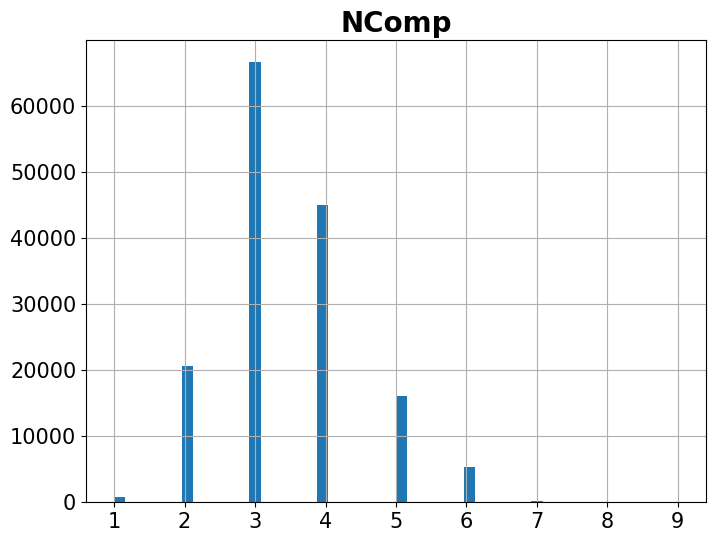

In [15]:
MP_bandgap['NComp'].hist(bins=50, figsize=(8,6))

#save_fig("attribute_histogram_plots")


#title_font = {'fontsize': 20,'fontweight': 'bold'}
plt.title('NComp', fontdict=title_font)

#plt.xlim([0, 10])
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

# Create a Test set

### random sampleing method

In [16]:
from sklearn.model_selection import train_test_split

random_train_set, random_test_set = train_test_split(MP_bandgap, test_size=0.2, random_state=0)

In [17]:
random_train_set

,Index,Formula,mp-id,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
2072,79427,Gd,mp-11421,0.0000,1,229,1,1.000000,1.000000,1.000000,...,194,194,194.0,0.200000,0.000000,0.100000,0.700000,0,0.000000,0.000000
6208,21679,CsHo(MoO4)2,mp-1213413,3.6087,24,49,4,0.697217,0.670979,0.666805,...,229,12,12.0,0.283784,0.432432,0.135135,0.148649,1,0.827201,0.261399
10032,71916,Ce(CuGe)2,mp-20173,0.0000,5,139,3,0.600000,0.514256,0.460906,...,225,194,225.0,0.148148,0.074074,0.759259,0.018519,0,0.179651,0.052286
2653,110950,LiPrNdO2,mp-1236275,0.0000,5,12,4,0.529150,0.444796,0.407234,...,229,12,12.0,0.375000,0.333333,0.000000,0.291667,0,0.779730,0.360937
12740,151979,CsMnGa2P3(H2O7)2,mp-1204881,3.3475,50,15,6,0.602661,0.566788,0.560271,...,229,2,12.0,0.328467,0.489051,0.182482,0.000000,1,0.827201,0.222242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,97639,In3Pt,mp-1184857,0.0000,4,139,2,0.790569,0.759147,0.750616,...,225,139,139.0,0.111111,0.047619,0.619048,0.222222,0,0.060587,0.022720
3113,95939,Sr2YCu2SnO7,mp-1046186,0.0000,26,46,5,0.590857,0.547721,0.538884,...,225,12,12.0,0.282353,0.352941,0.364706,0.000000,0,0.787757,0.317665
13076,152315,Li3Co2Si3O10,mp-759853,0.0000,36,2,4,0.613631,0.566808,0.556130,...,229,12,12.0,0.354839,0.494624,0.150538,0.000000,0,0.779730,0.300881
9655,117952,In3Ga,mp-974309,0.0000,4,225,2,0.790569,0.759147,0.750616,...,139,64,139.0,0.153846,0.076923,0.769231,0.000000,0,0.000225,0.000084


In [18]:
random_test_set

,Index,Formula,mp-id,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
13409,59822,TaAlFe,mp-1218064,0.0000,12,38,3,0.577350,0.480750,0.415244,...,229,225,227.666667,0.200000,0.033333,0.300000,0.466667,0,0.026858,0.009312
6048,98874,Y6Ga17Pd5,mp-1216283,0.0000,28,12,3,0.668153,0.620877,0.608072,...,225,64,64.000000,0.159170,0.058824,0.782007,0.000000,0,0.213451,0.046113
15053,92408,Ho4Co3,mp-1224199,0.0000,21,147,2,0.714286,0.642563,0.596290,...,194,194,194.000000,0.177215,0.000000,0.265823,0.556962,0,0.100238,0.049096
120,123888,TbSe3,mp-1208313,0.0000,4,65,2,0.790569,0.759147,0.750616,...,194,14,14.000000,0.135593,0.203390,0.508475,0.152542,0,0.361670,0.135626
9278,86633,Ba4Pr2Cu6O13,mp-1228176,0.0000,25,69,4,0.600000,0.541796,0.522451,...,229,12,12.000000,0.271605,0.320988,0.370370,0.037037,1,0.803211,0.329523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,54146,LiNi2P3O10,mp-17664,3.6058,32,11,4,0.667317,0.632412,0.625345,...,229,2,12.000000,0.322917,0.510417,0.166667,0.000000,1,0.779730,0.217059
11843,151082,Nd(NiSn)2,mp-569860,0.0000,5,139,3,0.600000,0.514256,0.460906,...,225,141,183.000000,0.185185,0.074074,0.666667,0.074074,0,0.154731,0.046999
7474,146713,Ta5Si3N,mp-1208335,0.0000,18,193,3,0.657342,0.594276,0.563972,...,229,194,229.000000,0.160714,0.080357,0.133929,0.625000,0,0.447278,0.090290
6459,145698,Ba2TbMgSbO6,mp-2217660,1.3710,11,8,5,0.596131,0.554561,0.545945,...,229,12,12.000000,0.323529,0.397059,0.147059,0.132353,1,0.803211,0.351680


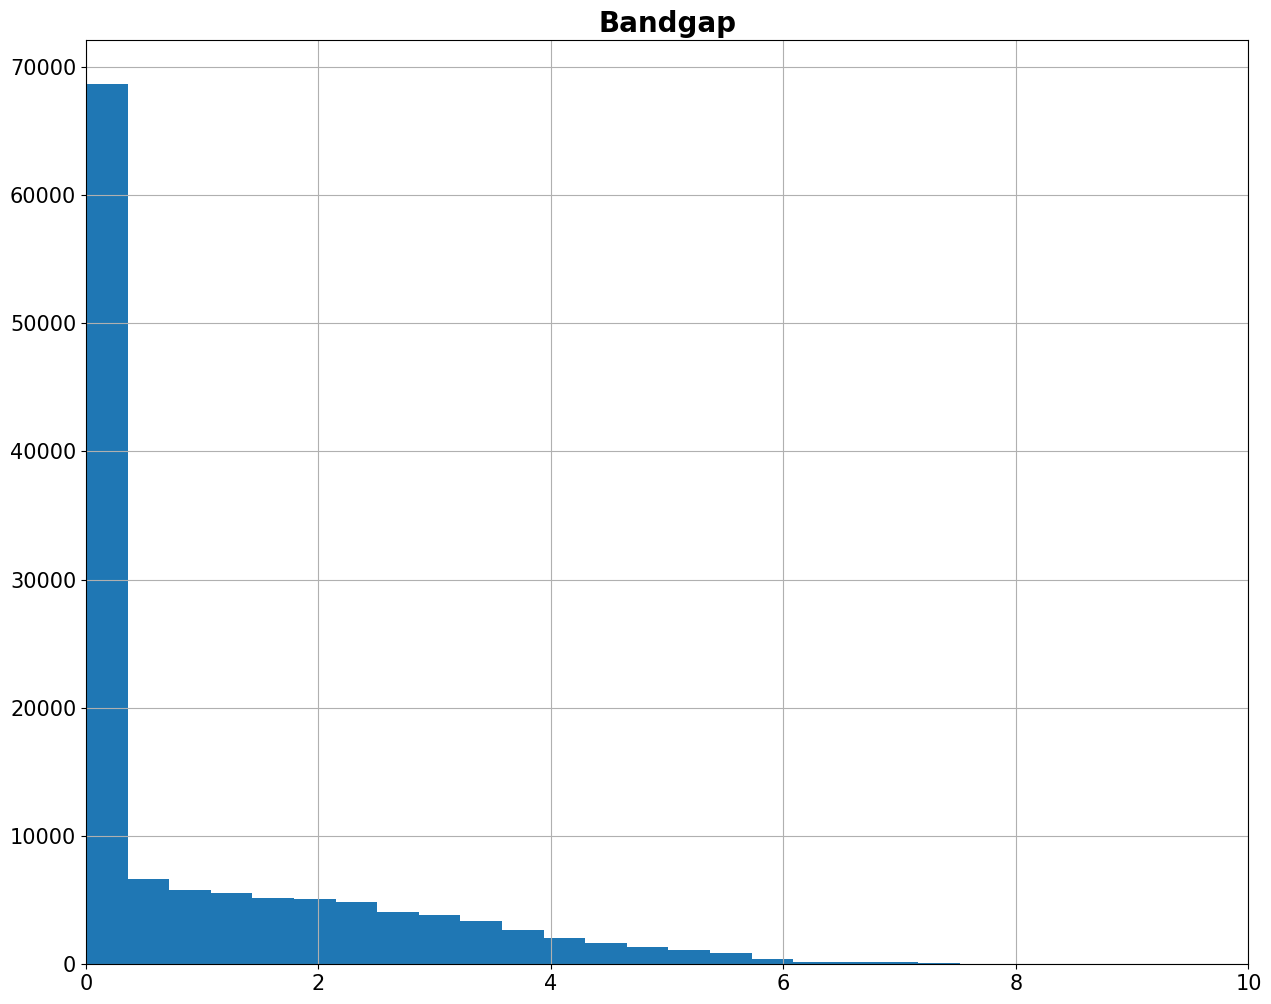

In [20]:
random_train_set['bandgap'].hist(bins=50, figsize=(15,12))

plt.title('Bandgap', fontdict=title_font)

plt.xlim([0, 10])
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

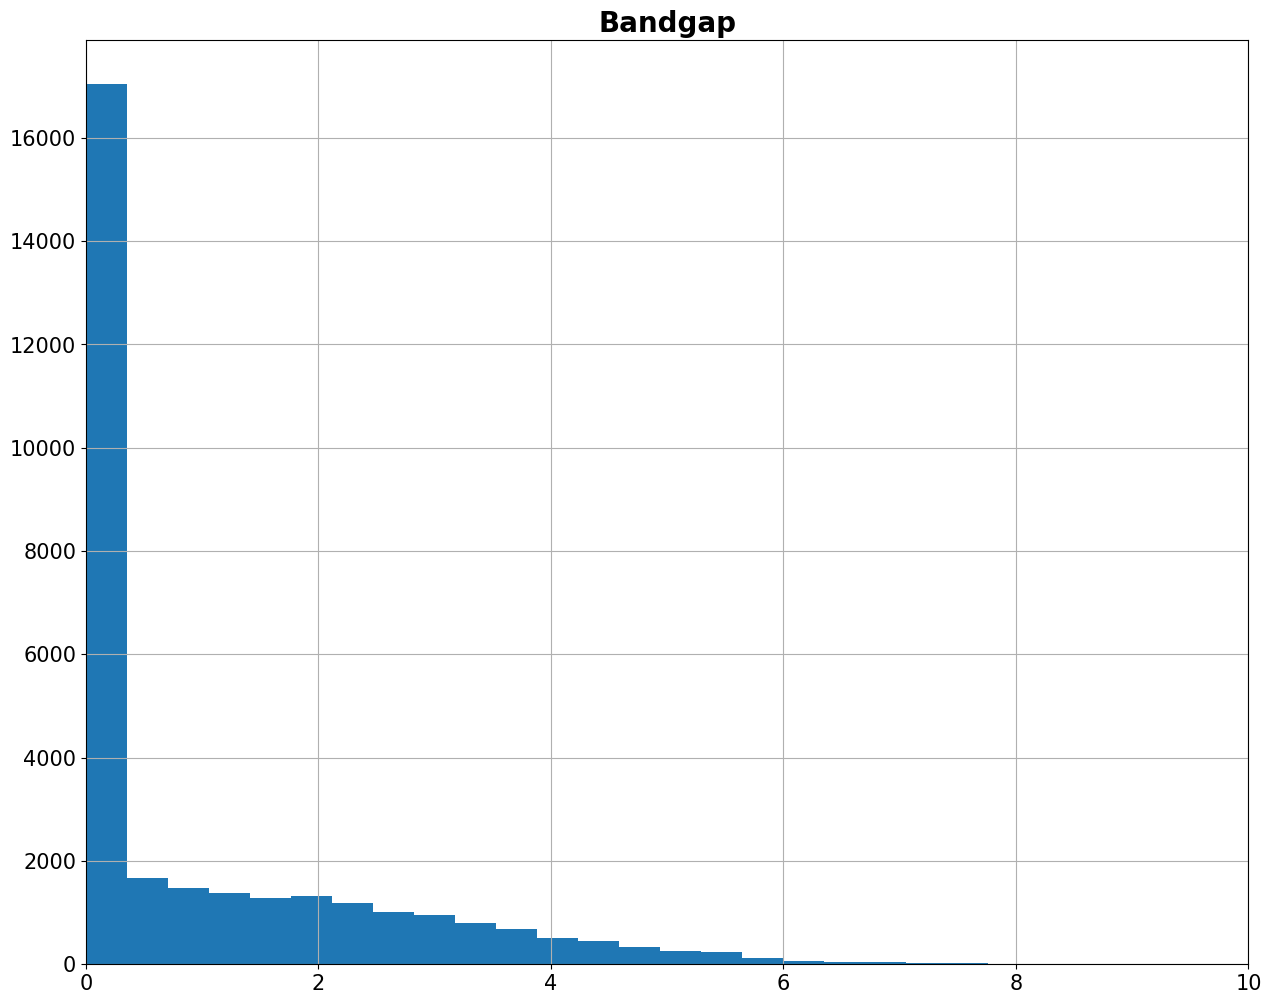

In [21]:
random_test_set['bandgap'].hist(bins=50, figsize=(15,12))

plt.title('Bandgap', fontdict=title_font)

plt.xlim([0, 10])
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

### stratified sampling method

In [22]:
MP_bandgap["bandgap_cat"] = pd.cut(MP_bandgap["bandgap"],
                                  bins = [-0.5,0., 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, np.inf],
                                   labels = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [23]:
MP_bandgap["bandgap_cat"].value_counts()

bandgap_cat
0     72895
1     16281
2     10735
3      9622
4      9030
5      8610
6      7046
7      6218
8      4641
9      3372
10     2438
11     1802
12     1078
13      378
14      306
15      169
16       97
Name: count, dtype: int64

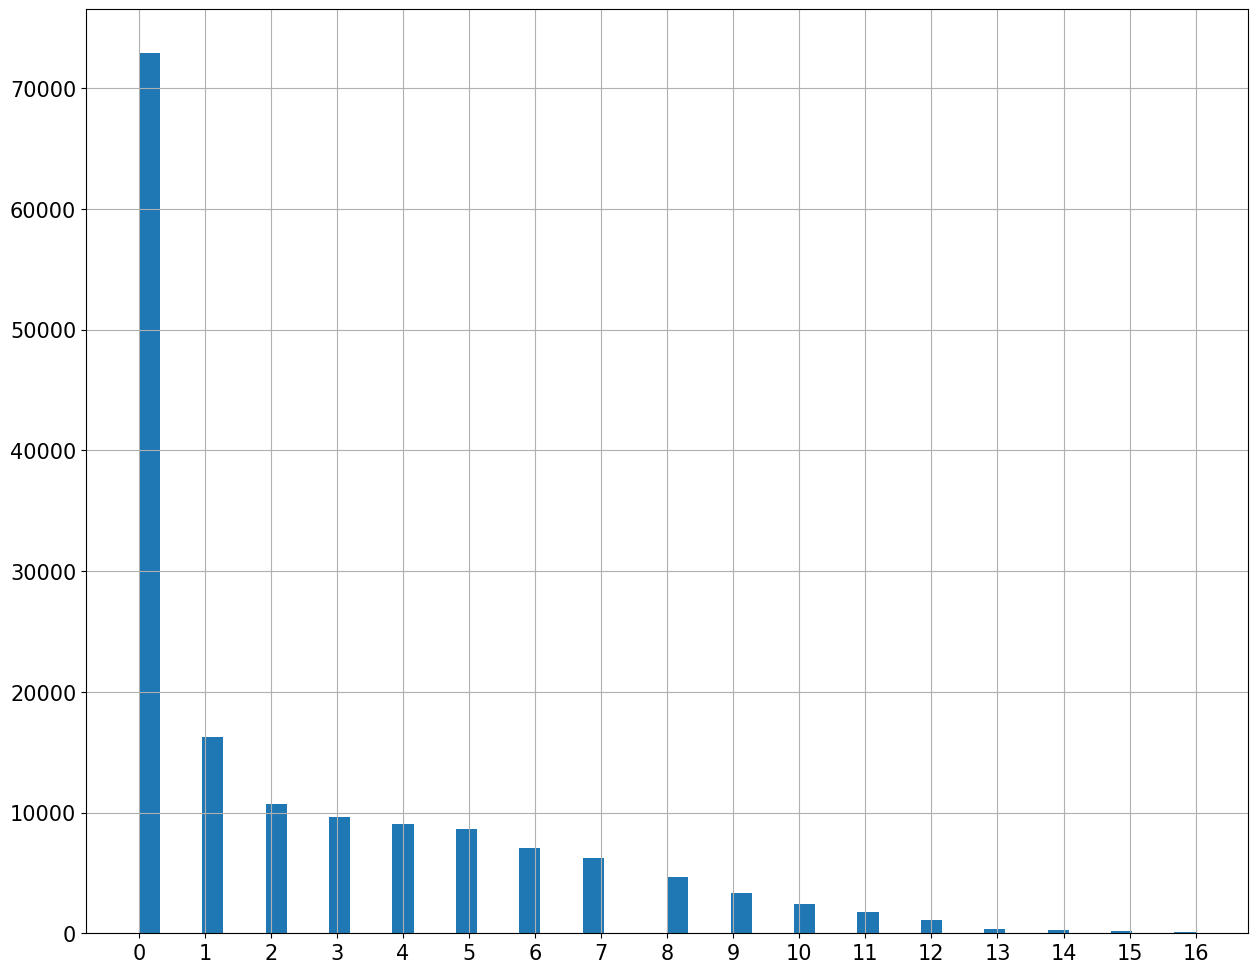

In [24]:
MP_bandgap["bandgap_cat"].hist(bins=50, figsize=(15,12))

plt.xticks(np.arange(0,17,1))
plt.show()

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(MP_bandgap, MP_bandgap["bandgap_cat"]):
    strat_train_set = MP_bandgap.iloc[train_index]
    strat_test_set = MP_bandgap.iloc[test_index]

In [27]:
MP_bandgap

,Index,Formula,mp-id,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,bandgap_cat
0,0,LiCaPb,mp-20998,0.0000,9,187,3,0.577350,0.480750,0.415244,...,225,226.333333,0.161290,0.064516,0.322581,0.451613,0,0.365948,0.160765,0
1,1,Li7Mn4CoO12,mp-1175256,0.7477,24,1,4,0.603807,0.536606,0.506969,...,12,12.000000,0.353448,0.413793,0.232759,0.000000,0,0.779730,0.357256,2
2,2,K2CuF4,mp-2865,0.0000,28,142,3,0.654654,0.597048,0.575065,...,15,15.000000,0.268293,0.487805,0.243902,0.000000,1,0.917619,0.428188,0
3,3,Li2Mn3Cr3O12,mp-850956,0.0927,20,10,4,0.644205,0.607092,0.600250,...,12,12.000000,0.309735,0.424779,0.265487,0.000000,0,0.779730,0.304103,1
4,4,Fe1B4,mp-1079437,0.0000,10,58,2,0.824621,0.804145,0.800156,...,166,166.000000,0.500000,0.200000,0.300000,0.000000,0,0.010964,0.003509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15474,154713,SrIn3,mp-1187154,0.0000,4,221,2,0.790569,0.759147,0.750616,...,139,139.000000,0.195122,0.073171,0.731707,0.000000,0,0.158210,0.059329,0
15475,154714,CaBiF5,mp-1368365,4.0617,28,14,3,0.742307,0.718075,0.714377,...,12,15.000000,0.212121,0.424242,0.151515,0.212121,1,0.891402,0.317238,9
15476,154715,Ba2MgTiO4,mp-2222934,0.0000,8,123,4,0.586302,0.524792,0.503277,...,12,12.000000,0.470588,0.470588,0.058824,0.000000,1,0.803211,0.369271,0
15477,154716,MnInPd2,mp-31328,0.0000,4,225,3,0.612372,0.538609,0.506099,...,139,225.000000,0.100000,0.025000,0.875000,0.000000,0,0.100238,0.037487,0


In [28]:
strat_test_set["bandgap_cat"].value_counts() / len(strat_test_set)

bandgap_cat
0     0.471141
1     0.105222
2     0.069383
3     0.062209
4     0.058363
5     0.055649
6     0.045534
7     0.040202
8     0.029990
9     0.021781
10    0.015770
11    0.011634
12    0.006980
13    0.002456
14    0.001971
15    0.001099
16    0.000614
Name: count, dtype: float64

In [29]:
MP_bandgap["bandgap_cat"].value_counts() / len(MP_bandgap)

bandgap_cat
0     0.471148
1     0.105230
2     0.069384
3     0.062191
4     0.058364
5     0.055650
6     0.045541
7     0.040189
8     0.029997
9     0.021794
10    0.015758
11    0.011647
12    0.006968
13    0.002443
14    0.001978
15    0.001092
16    0.000627
Name: count, dtype: float64

### random samping method vs stratified sampling method

In [30]:
random_test_set["bandgap_cat"] = pd.cut(random_test_set["bandgap"],
                                  bins = [-0.5,0., 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, np.inf],
                                   labels = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [31]:
def bandgap_cat_proportions(data):
    return data["bandgap_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(MP_bandgap, test_size=0.2, random_state=7)

compare_props = pd.DataFrame({
    "Overall": bandgap_cat_proportions(MP_bandgap),
    "Stratified": bandgap_cat_proportions(strat_test_set),
    "Random": bandgap_cat_proportions(random_test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [32]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
bandgap_cat,,,,,
0,0.471148,0.471141,0.470172,-0.207065,-0.001293
1,0.105230,0.105222,0.104188,-0.990163,-0.007435
2,0.069384,0.069383,0.070870,2.141204,-0.001293
3,0.062191,0.062209,0.061918,-0.437787,0.029885
4,0.058364,0.058363,0.060173,3.099442,-0.001293
5,0.055650,0.055649,0.055746,0.172921,-0.001293
6,0.045541,0.045534,0.044564,-2.144325,-0.015485
7,0.040189,0.040202,0.040234,0.111282,0.030872
8,0.029997,0.029990,0.029182,-2.716190,-0.022839


In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("bandgap_cat", axis=1, inplace=True)

/var/folders/6f/6_lc9cgj1_qgzwkbr1txp5j00000gn/T/ipykernel_39616/713655882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("bandgap_cat", axis=1, inplace=True)
/var/folders/6f/6_lc9cgj1_qgzwkbr1txp5j00000gn/T/ipykernel_39616/713655882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("bandgap_cat", axis=1, inplace=True)


In [34]:
strat_train_set.drop(['Index', 'Formula', 'mp-id'], axis=1, inplace = True)
strat_test_set.drop(['Index', 'Formula', 'mp-id'], axis=1, inplace = True)

/var/folders/6f/6_lc9cgj1_qgzwkbr1txp5j00000gn/T/ipykernel_39616/1853790461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop(['Index', 'Formula', 'mp-id'], axis=1, inplace = True)
/var/folders/6f/6_lc9cgj1_qgzwkbr1txp5j00000gn/T/ipykernel_39616/1853790461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop(['Index', 'Formula', 'mp-id'], axis=1, inplace = True)


In [35]:
train_set = strat_train_set
test_set = strat_test_set

In [36]:
train_set

,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
14050,2.4392,20,146,4,0.648074,0.609120,0.600524,0.600040,0.600001,17.300000,...,229,12,12.0,0.289855,0.347826,0.159420,0.202899,1,0.678329,0.261720
9944,1.2168,88,14,3,0.609837,0.528968,0.481796,0.467168,0.459210,33.454545,...,229,152,152.0,0.160714,0.214286,0.625000,0.000000,0,0.289812,0.129586
15378,0.0000,8,194,3,0.612372,0.538609,0.506099,0.501109,0.500098,29.750000,...,229,12,12.0,0.139535,0.186047,0.348837,0.325581,1,0.547107,0.204607
1935,0.0000,19,166,3,0.708085,0.656981,0.635478,0.632281,0.631641,22.210526,...,229,166,225.0,0.271429,0.042857,0.685714,0.000000,0,0.281525,0.026266
14229,0.9358,114,1,6,0.656314,0.634067,0.631616,0.631580,0.631579,11.105263,...,229,2,12.0,0.356436,0.594059,0.049505,0.000000,1,0.792998,0.267890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.9257,10,2,3,0.600000,0.514256,0.460906,0.441882,0.428730,22.000000,...,194,12,13.5,0.208333,0.375000,0.125000,0.291667,0,0.547107,0.161098
12425,0.0000,7,166,2,0.714286,0.642563,0.596290,0.581749,0.574568,26.714286,...,225,194,225.0,0.069767,0.000000,0.930233,0.000000,0,0.000000,0.000000
9495,1.3233,11,38,3,0.582102,0.488335,0.427181,0.405210,0.390820,34.000000,...,194,12,103.0,0.229167,0.291667,0.312500,0.166667,0,0.733532,0.307310
1738,0.0000,9,99,5,0.598352,0.561419,0.555698,0.555560,0.555556,21.333333,...,229,12,12.0,0.303571,0.357143,0.339286,0.000000,1,0.803211,0.313865


In [37]:
test_set

,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
9578,1.5987,16,36,4,0.586302,0.524792,0.503277,0.500565,0.500049,9.125000,...,229,12,15.0,0.341463,0.585366,0.073171,0.000000,1,0.894601,0.398482
3370,0.0000,4,221,2,0.790569,0.759147,0.750616,0.750049,0.750001,45.500000,...,194,194,194.0,0.400000,0.000000,0.150000,0.450000,0,0.000025,0.000009
5503,0.0000,6,139,4,0.527046,0.436790,0.385263,0.368439,0.357293,21.500000,...,225,166,195.5,0.363636,0.121212,0.515152,0.000000,0,0.408814,0.080290
10003,2.0369,114,9,6,0.655727,0.633966,0.631614,0.631580,0.631579,11.473684,...,229,2,12.0,0.368056,0.604167,0.027778,0.000000,1,0.792998,0.277209
15350,0.0000,10,148,3,0.663325,0.614463,0.600984,0.600078,0.600002,27.400000,...,229,12,12.0,0.219512,0.292683,0.146341,0.341463,0,0.820234,0.303754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,0.6917,24,1,4,0.603807,0.536606,0.506969,0.501658,0.500228,10.166667,...,229,12,12.0,0.353448,0.413793,0.232759,0.000000,0,0.779730,0.357256
5904,4.7145,30,5,3,0.689605,0.632748,0.606222,0.601390,0.600168,4.000000,...,229,12,194.0,0.500000,0.500000,0.000000,0.000000,1,0.792998,0.189448
4524,0.0076,2,187,2,0.707107,0.629961,0.574349,0.552045,0.535887,23.000000,...,194,194,194.0,0.500000,0.375000,0.125000,0.000000,1,0.563121,0.281561
671,0.0000,17,123,3,0.746387,0.714624,0.706463,0.705928,0.705884,24.823529,...,225,194,225.0,0.123457,0.074074,0.802469,0.000000,0,0.277400,0.098471


In [38]:
corr_matrix = train_set.corr()

In [39]:
corr_matrix['bandgap'].sort_values(ascending=False)

bandgap                      1.000000
CanFormIonic                 0.512913
frac_pValence                0.494154
max_Electronegativity        0.420207
maxdiff_Electronegativity    0.400274
                               ...   
frac_dValence               -0.403884
most_CovalentRadius         -0.408413
mean_Row                    -0.413997
mean_CovalentRadius         -0.420306
min_CovalentRadius          -0.421281
Name: bandgap, Length: 148, dtype: float64

array([[<AxesSubplot: xlabel='bandgap', ylabel='bandgap'>,
        <AxesSubplot: xlabel='CanFormIonic', ylabel='bandgap'>,
        <AxesSubplot: xlabel='frac_pValence', ylabel='bandgap'>,
        <AxesSubplot: xlabel='max_Electronegativity', ylabel='bandgap'>,
        <AxesSubplot: xlabel='maxdiff_Electronegativity', ylabel='bandgap'>,
        <AxesSubplot: xlabel='min_CovalentRadius', ylabel='bandgap'>,
        <AxesSubplot: xlabel='mean_CovalentRadius', ylabel='bandgap'>,
        <AxesSubplot: xlabel='mean_Row', ylabel='bandgap'>],
       [<AxesSubplot: xlabel='bandgap', ylabel='CanFormIonic'>,
        <AxesSubplot: xlabel='CanFormIonic', ylabel='CanFormIonic'>,
        <AxesSubplot: xlabel='frac_pValence', ylabel='CanFormIonic'>,
        <AxesSubplot: xlabel='max_Electronegativity', ylabel='CanFormIonic'>,
        <AxesSubplot: xlabel='maxdiff_Electronegativity', ylabel='CanFormIonic'>,
        <AxesSubplot: xlabel='min_CovalentRadius', ylabel='CanFormIonic'>,
        <AxesSubplot: 

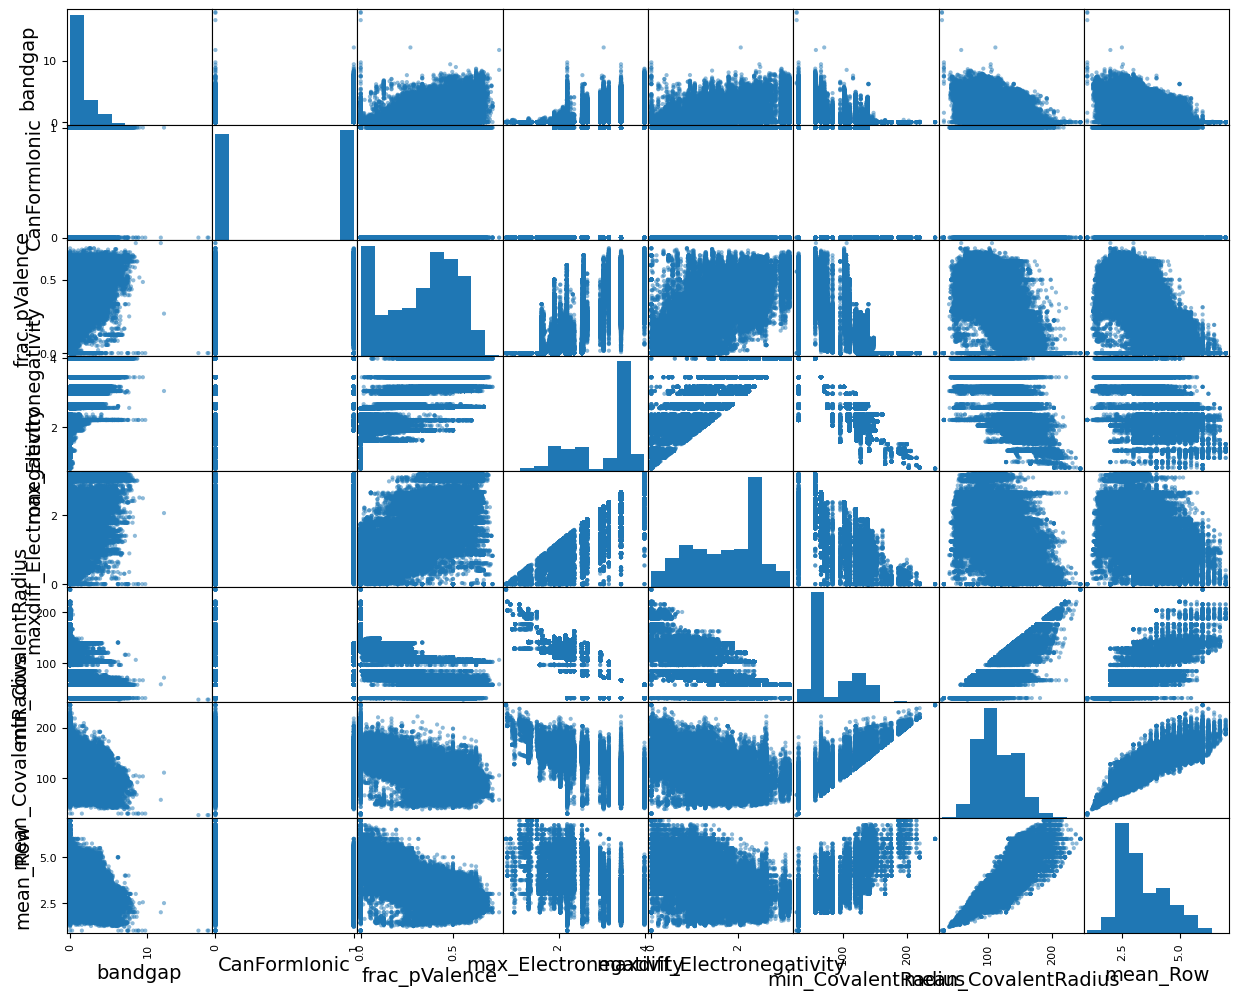

In [40]:
from pandas.plotting import scatter_matrix

attributes = ["bandgap", "CanFormIonic", "frac_pValence",
              "max_Electronegativity", 'maxdiff_Electronegativity', 'min_CovalentRadius', 'mean_CovalentRadius', 'mean_Row']
scatter_matrix(train_set[attributes], figsize=(15, 12))

(-1.0, 16.0, 0.0, 2.5)

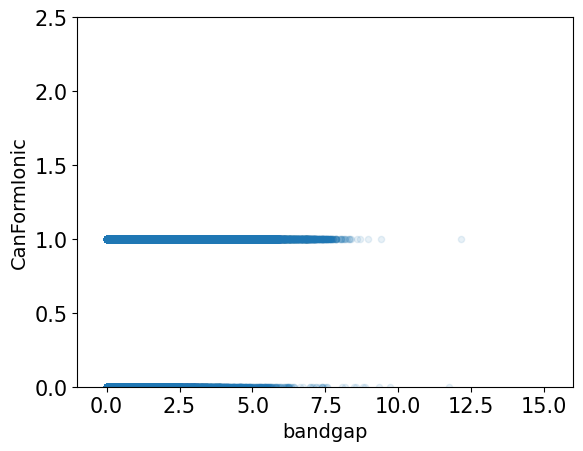

In [41]:
train_set.plot(kind="scatter", x="bandgap", y="CanFormIonic",
             alpha=0.1)
plt.axis([-1.0, 16, 0, 2.5])

(-1.0, 16.0, 0.0, 1.0)

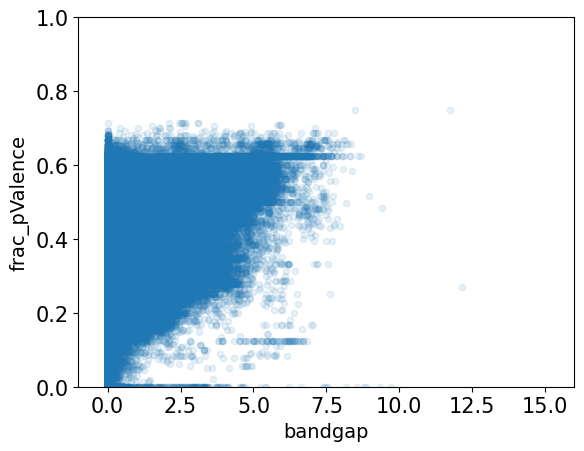

In [42]:
train_set.plot(kind="scatter", x="bandgap", y="frac_pValence",
             alpha=0.1)
plt.axis([-1.0, 16, 0, 1.0])

(-1.0, 16.0, 0.0, 5.0)

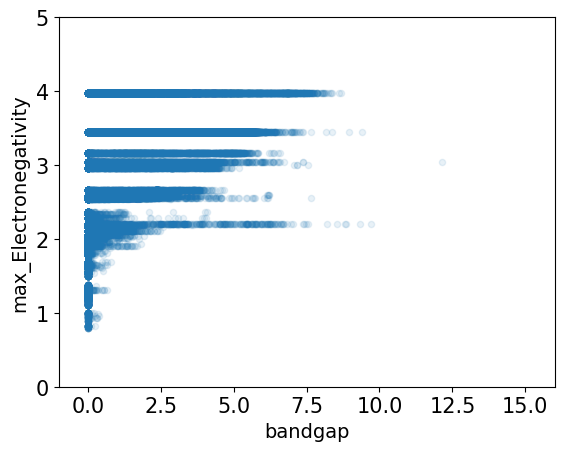

In [43]:
train_set.plot(kind="scatter", x="bandgap", y="max_Electronegativity",
             alpha=0.1)
plt.axis([-1, 16, 0, 5])

(-1.0, 16.0, 0.0, 250.0)

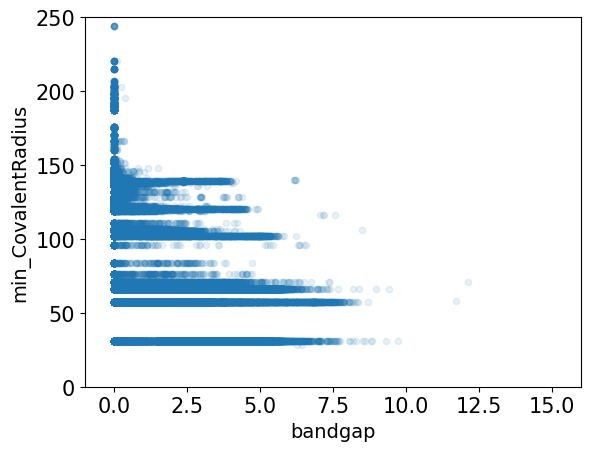

In [44]:
train_set.plot(kind="scatter", x="bandgap", y="min_CovalentRadius",
             alpha=0.1)
plt.axis([-1, 16, 0, 250])

(-1.0, 16.0, 0.0, 250.0)

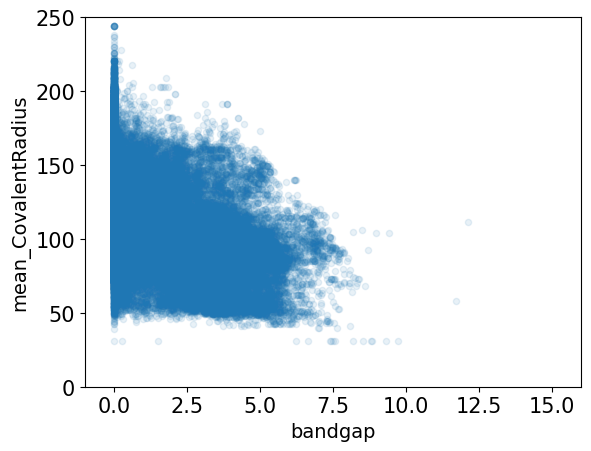

In [45]:
train_set.plot(kind="scatter", x="bandgap", y="mean_CovalentRadius",
             alpha=0.1)
plt.axis([-1, 16, 0, 250])

# Prepare the Data for Machine Learning Algorithms

In [46]:
train_set

,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
14050,2.4392,20,146,4,0.648074,0.609120,0.600524,0.600040,0.600001,17.300000,...,229,12,12.0,0.289855,0.347826,0.159420,0.202899,1,0.678329,0.261720
9944,1.2168,88,14,3,0.609837,0.528968,0.481796,0.467168,0.459210,33.454545,...,229,152,152.0,0.160714,0.214286,0.625000,0.000000,0,0.289812,0.129586
15378,0.0000,8,194,3,0.612372,0.538609,0.506099,0.501109,0.500098,29.750000,...,229,12,12.0,0.139535,0.186047,0.348837,0.325581,1,0.547107,0.204607
1935,0.0000,19,166,3,0.708085,0.656981,0.635478,0.632281,0.631641,22.210526,...,229,166,225.0,0.271429,0.042857,0.685714,0.000000,0,0.281525,0.026266
14229,0.9358,114,1,6,0.656314,0.634067,0.631616,0.631580,0.631579,11.105263,...,229,2,12.0,0.356436,0.594059,0.049505,0.000000,1,0.792998,0.267890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.9257,10,2,3,0.600000,0.514256,0.460906,0.441882,0.428730,22.000000,...,194,12,13.5,0.208333,0.375000,0.125000,0.291667,0,0.547107,0.161098
12425,0.0000,7,166,2,0.714286,0.642563,0.596290,0.581749,0.574568,26.714286,...,225,194,225.0,0.069767,0.000000,0.930233,0.000000,0,0.000000,0.000000
9495,1.3233,11,38,3,0.582102,0.488335,0.427181,0.405210,0.390820,34.000000,...,194,12,103.0,0.229167,0.291667,0.312500,0.166667,0,0.733532,0.307310
1738,0.0000,9,99,5,0.598352,0.561419,0.555698,0.555560,0.555556,21.333333,...,229,12,12.0,0.303571,0.357143,0.339286,0.000000,1,0.803211,0.313865


In [47]:
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
sample_incomplete_rows

,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
780,11.7274,1,225,1,1.0,1.0,1.0,1.0,1.0,10.0,...,225,225,225.0,0.25,0.75,0.0,0.0,0,NaN,NaN
12013,16.5864,1,191,1,1.0,1.0,1.0,1.0,1.0,2.0,...,225,225,225.0,1.00,0.00,0.0,0.0,0,NaN,NaN
8509,17.8914,1,225,1,1.0,1.0,1.0,1.0,1.0,2.0,...,225,225,225.0,1.00,0.00,0.0,0.0,0,NaN,NaN
7806,8.4898,2,194,1,1.0,1.0,1.0,1.0,1.0,18.0,...,225,225,225.0,0.25,0.75,0.0,0.0,0,NaN,NaN
272,17.7675,2,194,1,1.0,1.0,1.0,1.0,1.0,2.0,...,225,225,225.0,1.00,0.00,0.0,0.0,0,NaN,NaN


### MaxIonicChar, MeanIonicChar의 특성값이 없는 부분 존재

train_set.dropna(subset=["MaxIonicChar", "MeanIonicChar"])    # option 1 해당 구역 제거

train_set.drop(["MaxIonicChar", "MeanIonicChar"], axis=1)     # option 2 전체 특성 삭제

median = train_set["MaxIonicChar", "MeanIonicChar"].median()  # option 3 평균, 중간값등 값으로 채움

housing["total_bedrooms"].fillna(median, inplace=True)

In [48]:
sample_incomplete_rows.dropna(subset=["MaxIonicChar", "MeanIonicChar"])  # option 1

,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar


In [49]:
sample_incomplete_rows.drop(["MaxIonicChar", "MeanIonicChar"], axis=1)       # option 2

,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,maxdiff_SpaceGroupNumber,dev_SpaceGroupNumber,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic
780,11.7274,1,225,1,1.0,1.0,1.0,1.0,1.0,10.0,...,0,0.0,225,225,225.0,0.25,0.75,0.0,0.0,0
12013,16.5864,1,191,1,1.0,1.0,1.0,1.0,1.0,2.0,...,0,0.0,225,225,225.0,1.00,0.00,0.0,0.0,0
8509,17.8914,1,225,1,1.0,1.0,1.0,1.0,1.0,2.0,...,0,0.0,225,225,225.0,1.00,0.00,0.0,0.0,0
7806,8.4898,2,194,1,1.0,1.0,1.0,1.0,1.0,18.0,...,0,0.0,225,225,225.0,0.25,0.75,0.0,0.0,0
272,17.7675,2,194,1,1.0,1.0,1.0,1.0,1.0,2.0,...,0,0.0,225,225,225.0,1.00,0.00,0.0,0.0,0


In [50]:
maxioncchar_median = train_set["MaxIonicChar"].median()
sample_incomplete_rows["MaxIonicChar"].fillna(maxioncchar_median, inplace=True) # option 3

meanioncchar_median = train_set["MeanIonicChar"].median()
sample_incomplete_rows["MeanIonicChar"].fillna(meanioncchar_median, inplace=True)

In [51]:
sample_incomplete_rows

,bandgap,nsites,spacegroup_number,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
780,11.7274,1,225,1,1.0,1.0,1.0,1.0,1.0,10.0,...,225,225,225.0,0.25,0.75,0.0,0.0,0,0.590585,0.203416
12013,16.5864,1,191,1,1.0,1.0,1.0,1.0,1.0,2.0,...,225,225,225.0,1.00,0.00,0.0,0.0,0,0.590585,0.203416
8509,17.8914,1,225,1,1.0,1.0,1.0,1.0,1.0,2.0,...,225,225,225.0,1.00,0.00,0.0,0.0,0,0.590585,0.203416
7806,8.4898,2,194,1,1.0,1.0,1.0,1.0,1.0,18.0,...,225,225,225.0,0.25,0.75,0.0,0.0,0,0.590585,0.203416
272,17.7675,2,194,1,1.0,1.0,1.0,1.0,1.0,2.0,...,225,225,225.0,1.00,0.00,0.0,0.0,0,0.590585,0.203416


In [52]:
#option 2로 진행

train_set = train_set.dropna()
test_set = test_set.dropna()

# Select and Train a Model

### Training and Evaluating on the Training set

In [53]:
train_x = train_set.drop('bandgap', axis = 1)
train_y = train_set['bandgap']

test_x = test_set.drop('bandgap', axis = 1)
test_y = test_set['bandgap']


# LinearRegression

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

LinearRegression()

### Calculate RMSE, MAE, R2

In [55]:
from sklearn.metrics import mean_squared_error

LR_bandgap_predictions = lin_reg.predict(test_x)
LR_mse = mean_squared_error(test_y, LR_bandgap_predictions)
LR_rmse = np.sqrt(LR_mse)
LR_rmse

1.0717781112825095

In [56]:
from sklearn.metrics import mean_absolute_error

LR_mae = mean_absolute_error(test_y, LR_bandgap_predictions)
LR_mae

0.8078162326064245

In [57]:
from sklearn.metrics import r2_score
LR_r2 = r2_score(test_y, LR_bandgap_predictions)
LR_r2

0.48828763924173746

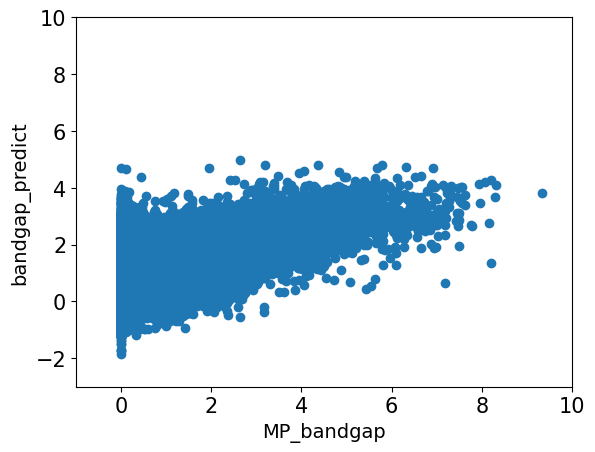

In [58]:
plt.scatter(test_y, LR_bandgap_predictions)
plt.xlabel('MP_bandgap')
plt.ylabel('bandgap_predict')

plt.xlim([-1.0, 10])
plt.ylim([-3.0, 10])
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)  
plt.show()

# DecisionTreeRegressor

In [59]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor(random_state=42)
DT_reg.fit(train_x, train_y)

DecisionTreeRegressor(random_state=42)

### Calculate RMSE, MAE, R2

In [60]:
from sklearn.metrics import mean_squared_error

DT_bandgap_predictions = DT_reg.predict(test_x)
DT_mse = mean_squared_error(test_y, DT_bandgap_predictions)
DT_rmse = np.sqrt(DT_mse)
DT_rmse

0.8652681585013374

In [61]:
from sklearn.metrics import mean_absolute_error

DT_mae = mean_absolute_error(test_y, DT_bandgap_predictions)
DT_mae

0.41926298093450026

In [62]:
from sklearn.metrics import r2_score
DT_r2 = r2_score(test_y, DT_bandgap_predictions)
DT_r2

0.6664832995917733

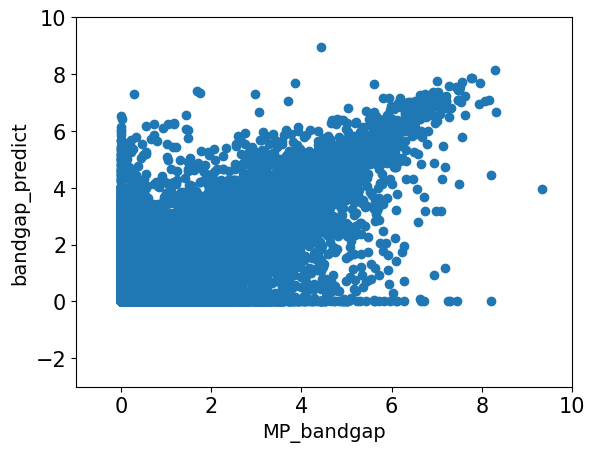

In [64]:
plt.scatter(test_y, DT_bandgap_predictions)
plt.xlabel('MP_bandgap')
plt.ylabel('bandgap_predict')

plt.xlim([-1.0, 10])
plt.ylim([-3.0, 10])
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)  
plt.show()

## RandomForestRegressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)
RF_reg.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [66]:
from sklearn.metrics import mean_squared_error

RF_bandgap_predictions = RF_reg.predict(test_x)
RF_mse = mean_squared_error(test_y, RF_bandgap_predictions)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

0.6500855813911505

In [69]:
from sklearn.metrics import mean_absolute_error

RF_mae = mean_absolute_error(test_y, DT_bandgap_predictions)
RF_mae

0.41926298093450026

In [70]:
from sklearn.metrics import r2_score
RF_r2 = r2_score(test_y, DT_bandgap_predictions)
RF_r2

0.6664832995917733



## Better Evaluation Using Cross-Validation

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT_reg,train_x, train_y,
                         scoring="neg_mean_squared_error", cv=5)
DT_rmse_scores = np.sqrt(-scores)

In [68]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(DT_rmse_scores)

Scores: [0.90548424 0.8761569  0.8788852  0.87889702 0.90067054]
Mean: 0.8880187799517575
Standard deviation: 0.012429335488558246
